<a href="https://colab.research.google.com/github/LucasVale98/Machine_Learning_e_Data_Science_com_Python_de_A-Z/blob/main/Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificacao**

Os problemas de regressão existem quando precisamos prever um valor numérico específico. Este valor pode ser o preço de um produto, o peso ou altura de uma pessoa, a metragem de uma casa, e assim por diante. Nestas situações, o modelo poderá apresentar como resposta qualquer valor. Por exemplo, você pode apresentar produtos e seus preços para que o algoritmo crie o modelo, e ainda que nestes produtos não exista nenhum preço superior a R$ 100,00 o modelo poderá realizar previsões de preços superiores a este valor.

Classificação: baseia-se em prever a categoria de uma observação dada. Aqui, procura-se estimar um “classificador” que gere como saída a classificação qualitativa de um dado não observado com base em dados de entrada (que abrangem observações com classificações já definidas).

* Exemplo: um classificador que utilize dados não observados de um paciente e classifique-o como doente ou não-doente.

In [ ]:
!pip install Orange3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.0 MB 266 kB/s 
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 8.3 MB 31.7 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 253 kB 44.8 MB/s 
     |████████████████████████████████| 149 kB 12.5 MB/s 
     |████████████████████████████████| 992 kB 24.1 MB/s 
     |████████████████████████████████| 492 kB 38.2 MB/s 
     |████████████████████████████████| 2.5 MB 30.1 MB/s 
     |████████████████████████████████| 228 kB 40.8 MB/s 
     |████████████████████████████████| 1.1 MB 16.0 MB/s 
     |████████████████████████████████| 68 kB 4.2 MB/s 
     |████████████████████████████████| 80 kB 3.8 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 51 kB 3.2 MB/s 
     |████████████████████████████████| 338

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pickle

In [ ]:
import Orange

# **Pré-processamento dos dados**

## **Base de dados de crédito**

In [ ]:
base_credit = pd.read_csv('/content/drive/MyDrive/datasets/Udemy/credit_data.csv')
base_credit.head()

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [ ]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [ ]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit[base_credit['income'] >= 69995.685578]

clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [ ]:
base_credit[base_credit['loan'] <= 1.377630]

clientid        income        age     loan  default
865       866  28072.604355  54.142548  1.37763        0

### **Visualização dos dados**

In [ ]:
np.unique(base_credit.default, return_counts=True)

(array([0, 1]), array([1717,  283]))

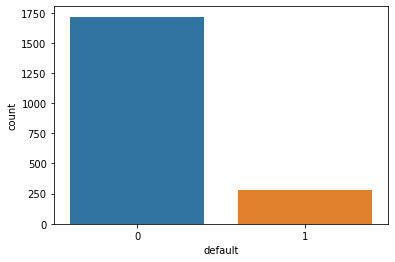

In [ ]:
sns.countplot(x=base_credit['default']);

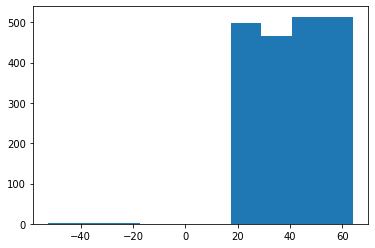

In [ ]:
plt.hist(x = base_credit['age']);

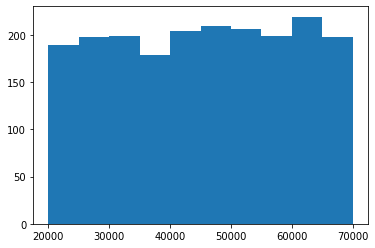

In [ ]:
plt.hist(x = base_credit['income']);

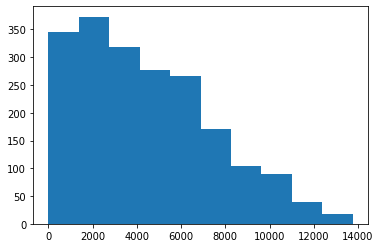

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], 
                            color='default')
grafico.show()

### **Tratamento de valores inconsistentes**

In [ ]:
base_credit.loc[base_credit['age'] < 0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [ ]:
base_credit['age'].mean()

40.80755937840458

In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
base_credit.loc[base_credit['age'] < 0] 

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], 
                            color='default')
grafico.show()

### **Tratamento de valores faltantes**

In [ ]:
base_credit.isnull()

clientid  income    age   loan  default
0        False   False  False  False    False
1        False   False  False  False    False
2        False   False  False  False    False
3        False   False  False  False    False
4        False   False  False  False    False
...        ...     ...    ...    ...      ...
1995     False   False  False  False    False
1996     False   False  False  False    False
1997     False   False  False  False    False
1998     False   False  False  False    False
1999     False   False  False  False    False

[2000 rows x 5 columns]

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

### **Divisão entre previsores e classe**

In [ ]:
base_credit.head()

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [ ]:
base_credit.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

### **Escalonamento dos atributos**

**sklearn.preprocessing.StandardScaler**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min() 

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max() 

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
sacler_credit = StandardScaler()
X_credit = sacler_credit.fit_transform(X_credit)

In [ ]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [ ]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min() 

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max() 

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

## **Base de dados do censo**

In [ ]:
base_census = pd.read_csv('/content/drive/MyDrive/datasets/Udemy/census.csv')
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [ ]:
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### **Visualização dos dados**

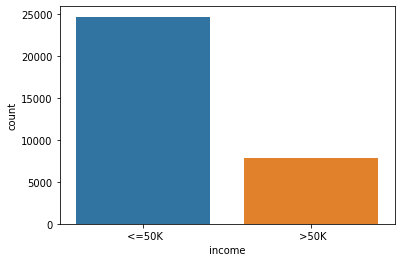

In [ ]:
sns.countplot(x=base_census['income']);

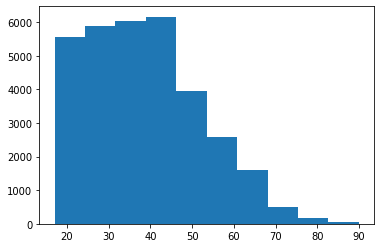

In [ ]:
plt.hist(x=base_census['age']);

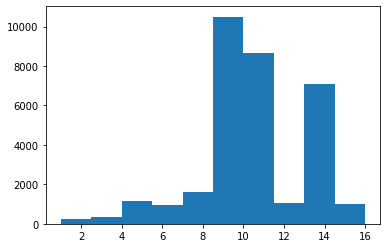

In [ ]:
plt.hist(x=base_census['education-num']);

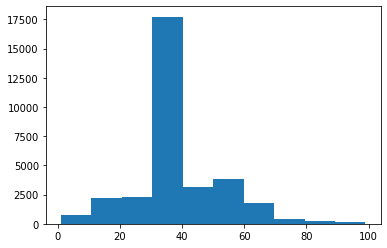

In [ ]:
plt.hist(x=base_census['hour-per-week']);

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

### **Divisão entre previsores e classe**

In [ ]:
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### **Atributos categóricos - LabelEncoder**

**sklearn.preprocessing.LabelEncoder**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

### **Atributos categóricos - OneHotEncoder**

**sklearn.preprocessing.OneHotEncoder**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder

**sklearn.compose.ColumnTransformer**

https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
oneHotEncoder_census = ColumnTransformer(transformers=[('OneHot', 
                                                        OneHotEncoder(), 
                                                        [1, 3, 5, 6, 7, 8, 9, 13])], 
                                         remainder='passthrough')

In [ ]:
X_census = oneHotEncoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape

(32561, 108)

### **Escalonamento dos atributos**

**sklearn.preprocessing.StandardScaler**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## **Bases de treinamento e teste**

**sklearn.model_selection.train_test_split**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

### **Base de dados de crédito**

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, 
                                                                                              y_credit,
                                                                                              test_size= 0.25,
                                                                                              random_state=0)

In [ ]:
X_credit_treinamento.shape

(1500, 3)

In [ ]:
y_credit_treinamento.shape

(1500,)

In [ ]:
X_credit_teste.shape

(500, 3)

In [ ]:
y_credit_teste.shape

(500,)

### **Base de dados do censo**

In [ ]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, 
                                                                                              y_census,
                                                                                              test_size= 0.15,
                                                                                              random_state=0)

In [ ]:
X_census_treinamento.shape

(27676, 108)

In [ ]:
y_census_treinamento.shape

(27676,)

In [ ]:
X_census_teste.shape

(4885, 108)

In [ ]:
y_census_teste.shape

(4885,)

## **Salvar as bases de dados**

**Base de dados de crédito**

In [ ]:
with open('credit.pkl', mode='wb') as f:
  pickle.dump([X_credit_treinamento,
               y_credit_treinamento,
               X_credit_teste,
               y_credit_teste], f)

**Base de dados do censo**

In [ ]:
with open('census.pkl', mode='wb') as f:
  pickle.dump([X_census_treinamento,
               y_census_treinamento,
               X_census_teste,
               y_census_teste], f)

# **Aprendizagem Bayesiana** 

A inferência bayesiana (IB) consiste na avaliação de hipóteses pela máxima verossimilhança, uma decorrência imediata da fórmula de Bayes, e é fundamental para métodos computacionais relacionados à inteligência, mineração de dados, ou linguística histórica, sejam eles métodos bayesianos de aprendizado de máquina (AM) ou não-bayesianos. A IB é uma extensão da estatística bayesiana e da inferência estatística para a inteligência computacional (IC), onde é sinônimo de aprendizado bayesiano (ou aprendizado de máquina bayesiano), e encontra aplicações em domínios igualmente genéricos, e.g. na biomedicina, computação em nuvem, pesquisa de algoritmos, criatividade computacional. Os resultados, em termos de classificação e regressão, por exemplo, são em muito casos satisfatórios e até difíceis de serem aprimorados, de propriedades convenientes e bem conhecidas, e constituem baselines.

As implementações básicas são adaptadas a muitos casos elaborados de IA, em detrimento do valor como baseline, mas muitas vezes com modelos já bem desenvolvidos e teoria estabelecida e profunda. Além da utilidade singular para implementações e lida com problemas reais (através da modelagem e da consideração dos dados), a IB é a simples aplicação do teorema de Bayes a hipóteses h e evidências e, i.e. do relacionamento entre as probabilidades condicionais e absolutas:

**sklearn.naive_bayes.GaussianNB**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
from sklearn.naive_bayes import GaussianNB

## **Naïve bayes - base risco de crédito**

In [ ]:
base_risco_credito = pd.read_csv('/content/drive/MyDrive/datasets/Udemy/risco_credito.csv')
base_risco_credito.head()

historia divida garantias     renda     risco
0          ruim   alta   nenhuma      0_15      alto
1  desconhecida   alta   nenhuma     15_35      alto
2  desconhecida  baixa   nenhuma     15_35  moderado
3  desconhecida  baixa   nenhuma  acima_35      alto
4  desconhecida  baixa   nenhuma  acima_35     baixo

In [ ]:
base_risco_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   historia   14 non-null     object
 1   divida     14 non-null     object
 2   garantias  14 non-null     object
 3   renda      14 non-null     object
 4   risco      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
base_risco_credito.describe()

historia divida garantias     renda risco
count             14     14        14        14    14
unique             3      2         2         3     3
top     desconhecida   alta   nenhuma  acima_35  alto
freq               5      7        11         7     6

In [ ]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
with open('risco_redito.pkl', mode='wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [ ]:
navie_risco_crdito = GaussianNB()
navie_risco_crdito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
previsao = navie_risco_crdito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

## **Naïve bayes - base crédito**

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
navie_credit_data = GaussianNB()
navie_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes = navie_credit_data.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.938

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

**Confusion Matrix**

https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

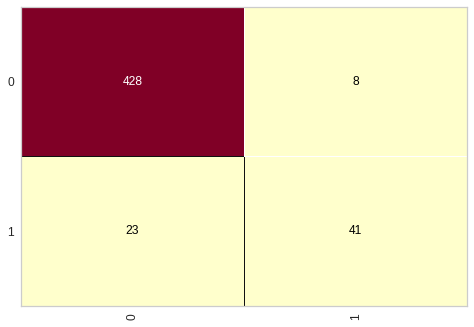

In [ ]:
cm = ConfusionMatrix(navie_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## **Naïve bayes - base censo**

In [ ]:
with open('/content/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_census_teste, previsoes)

array([[1172, 2521],
       [  35, 1157]])

**Confusion Matrix**

https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

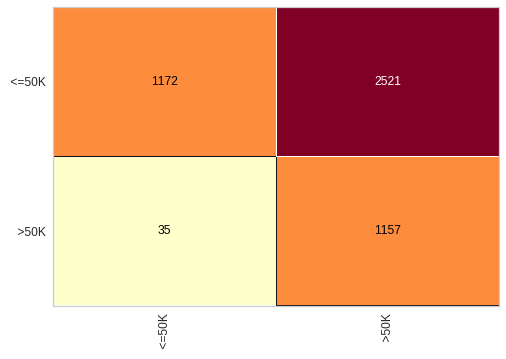

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

# **Aprendizagem por Árvores de Decisão**

O aprendizado de árvore de decisão ou indução de árvores de decisão é uma das abordagens de modelagem preditiva usadas em estatística, mineração de dados e aprendizado de máquina. Ele usa uma árvore de decisão (como um modelo preditivo) para ir de observações sobre um item (representado nos ramos) para conclusões sobre o valor alvo do item (representado nas folhas). Os modelos de árvore em que a variável de destino pode assumir um conjunto discreto de valores são chamados de árvores de classificação; nessas estruturas de árvore, as folhas representam rótulos de classe e os ramos representam conjunções de características que levam a esses rótulos de classe. As árvores de decisão em que a variável de destino pode assumir valores contínuos (normalmente números reais) são chamadas de árvores de regressão. As árvores de decisão estão entre os algoritmo de aprendizado de máquina mais populares devido à sua inteligibilidade e simplicidade.[1]

Na análise de decisão, uma árvore de decisão pode ser usada para representar visualmente e explicitamente as decisões e a tomada de decisão. Na mineração de dados, uma árvore de decisão descreve os dados (mas a árvore de classificação resultante pode ser uma entrada para a tomada de decisão). Esta página trata das árvores de decisão na mineração de dados.

**Decision Trees**

https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn import tree

**sklearn.tree.DecisionTreeClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## **Árvores de decisão - base risco crédito**

In [ ]:
with open('/content/risco_redito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion="entropy")
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

**sklearn.tree.plot_tree**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.tree import plot_tree

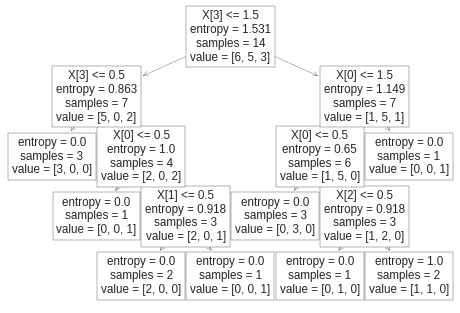

In [ ]:
tree.plot_tree(arvore_risco_credito);

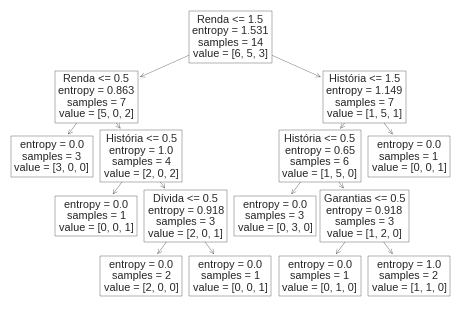

In [ ]:
previsoes = ['História', 'Dívida', 'Garantias', 'Renda']
tree.plot_tree(arvore_risco_credito, feature_names=previsoes);

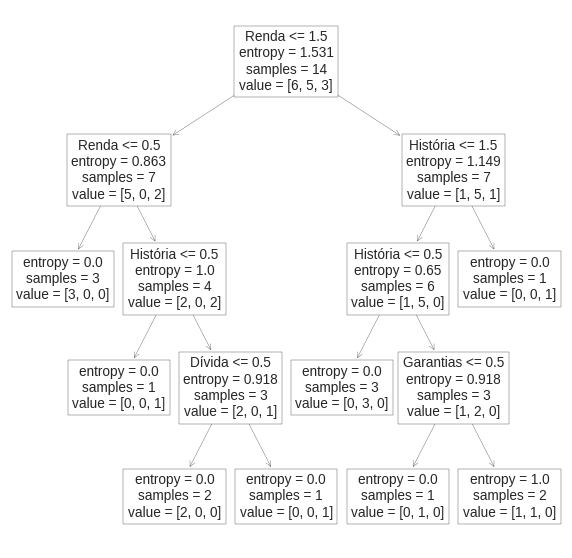

In [ ]:
previsoes = ['História', 'Dívida', 'Garantias', 'Renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsoes);

In [ ]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

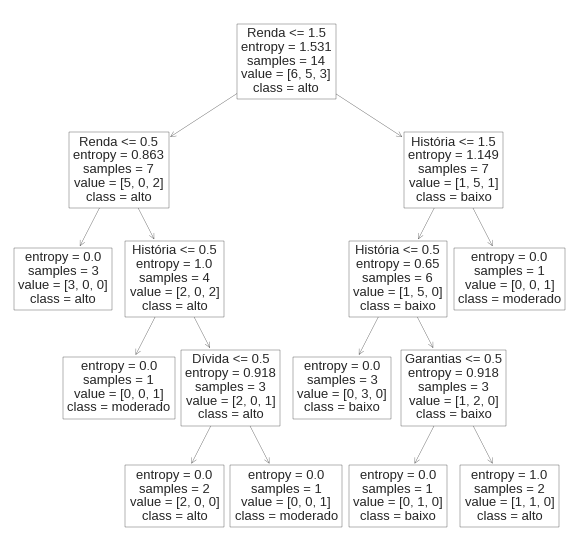

In [ ]:
previsoes = ['História', 'Dívida', 'Garantias', 'Renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsoes, class_names=arvore_risco_credito.classes_);

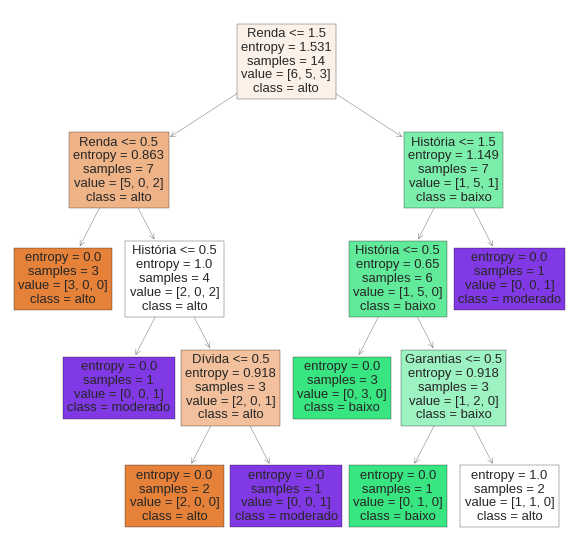

In [ ]:
previsoes = ['História', 'Dívida', 'Garantias', 'Renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsoes, class_names=arvore_risco_credito.classes_, filled=True);

## **Árvores de decisão - base crédito**

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
 X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [ ]:
y_credit_treinamento

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_credit_teste

array([[ 1.59301567, -1.35435846,  2.58262733],
       [ 0.99769755,  0.99806572,  0.84418709],
       [-0.42485257,  0.55812622, -1.15785286],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion="entropy", random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

1.0

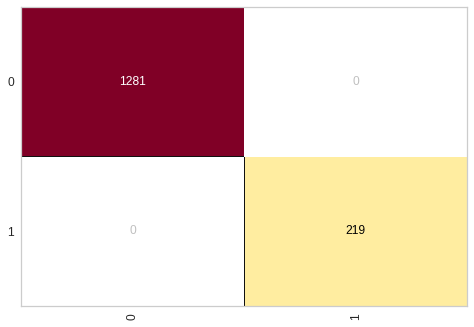

In [ ]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_treinamento, y_credit_treinamento)

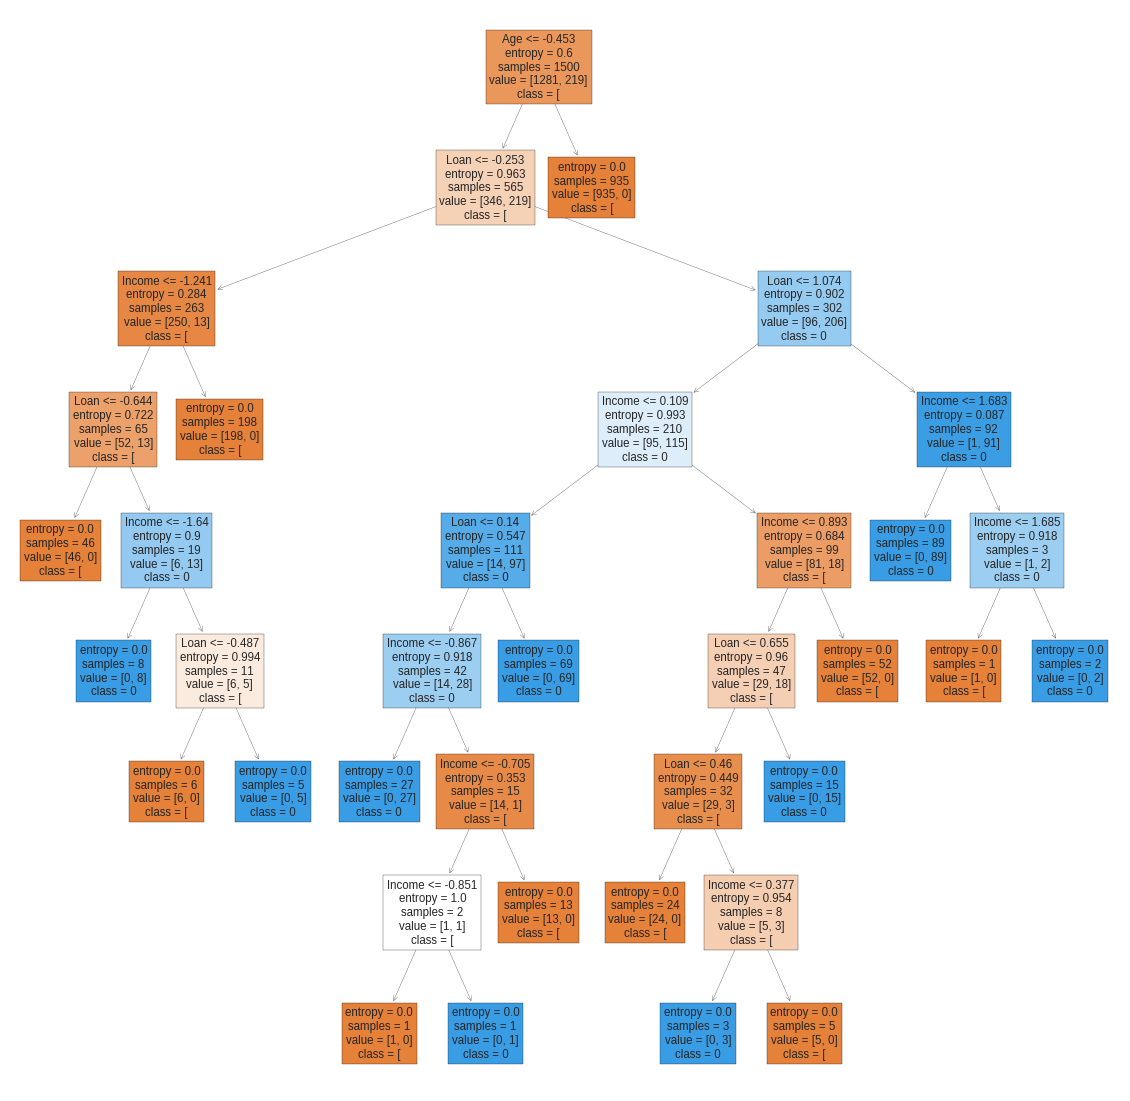

In [ ]:
previsoes = ['Income', 'Age', 'Loan']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsoes, class_names=str(arvore_credit.classes_), filled=True);

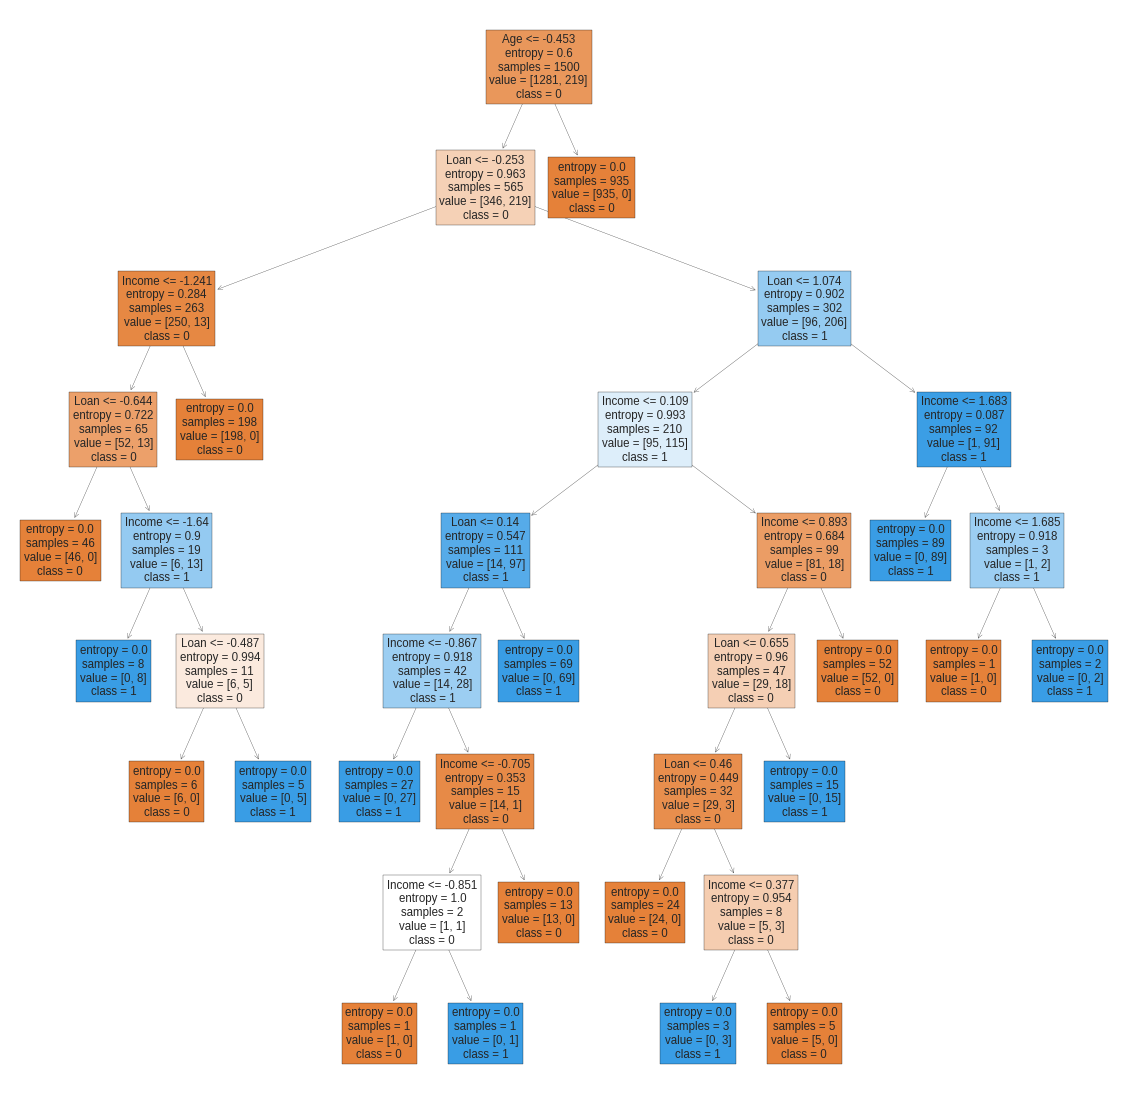

In [ ]:
previsoes = ['Income', 'Age', 'Loan']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsoes, class_names=['0', '1'], filled=True);
figura.savefig('arvore_credit.png')

## **Árvores de decisão - base censo**

In [ ]:
with open('/content/census.pkl', 'rb') as f:
 X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_treinamento.shape

((4885, 108), (27676,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

# **Aprendizagem por regras**

A indução de regras é uma área de aprendizado de máquina na qual regras formais são extraídas de um conjunto de observações. As regras extraídas podem representar um modelo científico completo dos dados, ou meramente representar padrões locais nos dados.

A mineração de dados em geral e a indução de regras em detalhes estão tentando criar algoritmos sem programação humana, mas analisando estruturas de dados existentes. [1] : 415-  No caso mais fácil, uma regra é expressa com “declarações if-then” e foi criada com o algoritmo ID3 para aprendizado de árvore de decisão. [2] : 7  [1] : 348  O algoritmo de aprendizado de regras está recebendo dados de treinamento como entrada e criando regras particionando a tabela com análise de cluster . [2] : 7  Uma possível alternativa ao algoritmo ID3 é a programação genética que evolui um programa até que ele se ajuste aos dados. [3] : 2 

## **Indução de regras - base risco crédito**

In [ ]:
base_risco_credito = Orange.data.Table('/content/drive/MyDrive/datasets/Udemy/risco_credito_regras.csv')
base_risco_credito

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [ ]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito= cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [ ]:
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0])

In [ ]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
base_risco_credito.domain.class_var

DiscreteVariable(name='risco', values=('alto', 'baixo', 'moderado'))

In [ ]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [ ]:
for i in previsoes:
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


## **Indução de regras - base crédito**

In [ ]:
base_credit = Orange.data.Table('/content/drive/MyDrive/datasets/Udemy/credit_data_regras.csv')
base_credit

[[66155.9, 59.017, 8106.53 | 0],
 [34415.2, 48.1172, 6564.75 | 0],
 [57317.2, 63.108, 8020.95 | 0],
 [42709.5, 45.752, 6103.64 | 0],
 [66952.7, 18.5843, 8770.1 | 1],
 ...
]

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)
base_dividida

([[61236.4, 36.0017, 6562.9 | 0],
  [23122.1, 53.3095, 4263.49 | 0],
  [27028.2, 48.1096, 331.364 | 0],
  [57341.4, 23.4785, 784.895 | 0],
  [58038.9, 54.0021, 538.231 | 0],
  ...
 ], [[45818.3, 48.4508, 8137.16 | 0],
  [53812.2, 44.9192, 3245.04 | 0],
  [47433.4, 60.4552, 9139.14 | 0],
  [34476.7, 23.351, 898.134 | 0],
  [55305.6, 53.5823, 8176.71 | 0],
  ...
 ])

In [ ]:
base_dividida[0]

[[61236.4, 36.0017, 6562.9 | 0],
 [23122.1, 53.3095, 4263.49 | 0],
 [27028.2, 48.1096, 331.364 | 0],
 [57341.4, 23.4785, 784.895 | 0],
 [58038.9, 54.0021, 538.231 | 0],
 ...
]

In [ ]:
base_dividida[1]

[[45818.3, 48.4508, 8137.16 | 0],
 [53812.2, 44.9192, 3245.04 | 0],
 [47433.4, 60.4552, 9139.14 | 0],
 [34476.7, 23.351, 898.134 | 0],
 [55305.6, 53.5823, 8176.71 | 0],
 ...
]

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2507.64970973955 AND income>=20145.9885970689 THEN default=0 
IF age<=18.1760434475727 AND age>=18.1760434475727 THEN default=1 
IF age<=18.3097456344403 AND income>=52981.508597731605 THEN default=0 
IF loan>=7745.75480897024 AND age>=20.8043047981337 THEN default=1 
IF income>=46911.197102163 AND loan>=8092.982779946221 THEN default=1 
IF income>=58132.4712652713 THEN default=0 
IF loan>=6019.83442285853 AND age>=26.854012909811 THEN default=1 
IF loan>=6415.0862444378 THEN default=1 
IF income>=48790.1324336417 THEN default=0 
IF loan>=3665.88089899456 AND loan>=5785.88427485782 THEN default=1 
IF income>=31702.3342987522 AND income>=45971.133494749694 THEN default=0 
IF loan>=3665.88089899456 AND loan>=5416.3577980789005 THEN default=1 
IF income>=31702.3342987522 AND income>=40496.2558229454 THEN default=0 
IF loan>=4462.82325767409 THEN default=1 
IF income>=31702.3342987522 AND income>=33489.0398592688 THEN default=0 
IF loan>=31

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda tesdata: regras_credit])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.994])

## **Classificador base (majority learner) - base crédito**

In [ ]:
base_credit = Orange.data.Table('/content/drive/MyDrive/datasets/Udemy/credit_data_regras.csv')
base_credit.domain

[income, age, loan | default]

In [ ]:
majority = Orange.classification.MajorityLearner()
majority

MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [ ]:
for registros in base_credit:
  print(registros)

[66155.9, 59.017, 8106.53 | 0]
[34415.2, 48.1172, 6564.75 | 0]
[57317.2, 63.108, 8020.95 | 0]
[42709.5, 45.752, 6103.64 | 0]
[66952.7, 18.5843, 8770.1 | 1]
[24904.1, 57.4716, 15.4986 | 0]
[48430.4, 26.8091, 5722.58 | 0]
[24500.1, 32.8975, 2971 | 1]
[40654.9, 55.4969, 4755.83 | 0]
[25075.9, 39.7764, 1409.23 | 0]
[64131.4, 25.6796, 4351.03 | 0]
[59436.8, 60.4719, 9254.24 | 0]
[61050.3, 26.355, 5893.26 | 0]
[27268, 61.5768, 4759.79 | 0]
[63062, 39.2016, 1850.37 | 0]
[50501.7, -28.2184, 3977.29 | 0]
[43548.7, 39.5745, 3935.54 | 0]
[43378.2, 60.8483, 3277.74 | 0]
[20542.4, 61.6906, 3157.44 | 0]
[58887.4, 26.0761, 4965.52 | 0]
[23000.8, 31.7614, 1148.12 | 0]
[32197.6, -52.4233, 4244.06 | 0]
[23329.3, 48.577, 222.622 | 0]
[27845.8, 51.9706, 4959.92 | 0]
[65302, 48.8409, 5465.27 | 0]
[47451.6, 27.0317, 5361.28 | 0]
[63287, -36.497, 9595.29 | 0]
[45727.5, 55.8399, 6376.82 | 0]
[59417.8, ?, 2082.63 | 0]
[58842.9, 54.5109, 10871.2 | 0]
[48528.9, ?, 6155.78 | 0]
[23526.3, ?, 2862.01 | 0]
[67252.9,

In [ ]:
for registros in base_credit:
  print(registros.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [ ]:
from collections import Counter
Counter(str(resgistro.get_class()) for resgistro in base_credit)

Counter({'0': 1717, '1': 283})

## **Classificador base (majority learner) -base censo**

In [ ]:
base_census = Orange.data.Table('/content/drive/MyDrive/datasets/Udemy/census_regras.csv')
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
majority = Orange.classification.MajorityLearner()
majority

MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census,base_census, [majority])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [ ]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

# **Aprendizagem baseada em instâncias**

**kNN**

* A maioria dos métodos de aprendizagem constroem um modelo após
o treinamento (os dados são descartados após a criação do modelo)

* Métodos baseados em instâncias simplesmente armazenam os
exemplos de treinamento
* A generalização/previsão é feita somente quando uma nova instância
precisa ser classificada (lazy)
* Paradigmas de aprendizagem de máquina

kNN

* Algoritmo simples e poderoso
* Indicado quando o relacionamento entre as características é complexo
* Valor de k pequeno: dados com ruídos ou outliers podem prejudicar
* Valor de k grande: tendência a classificar a classe com mais elementos
(overfitting) – valor default 3 ou 5
* Lento para fazer as previsões
* Outras distâncias
  * Coeficiente de Pearson
  * Índice de Tanimoto
  * City Block

**sklearn.neighbors.KNeighborsClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## **kNN - base crédito**

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors= 5)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.986

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

0.986

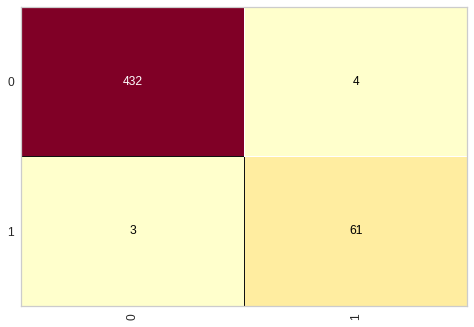

In [ ]:
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## **kNN - base censo**

In [ ]:
with open('/content/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors= 5)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8223132036847492

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

0.8223132036847492

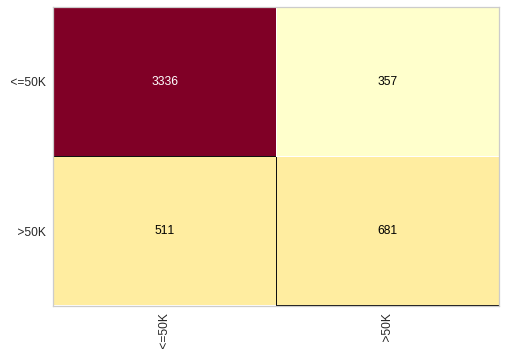

In [ ]:
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

# **Regressão logística**

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

**sklearn.linear_model.LogisticRegression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

## **Regressão logística - base risco de crédito**

In [ ]:
with open('/content/risco_redito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
X_risco_credito = np.delete(X_risco_credito, [2,7,11], axis= 0)
y_risco_credito = np.delete(y_risco_credito, [2,7,11], axis= 0)

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [ ]:
logistic_risco_credito = LogisticRegression(random_state= 1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [ ]:
logistic_risco_credito.intercept_

array([-0.80828993])

In [ ]:
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

## **Regressão logística - base crédito**

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
logistic_credit = LogisticRegression(random_state= 1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [ ]:
logistic_credit.intercept_

array([-6.02976095])

In [ ]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [ ]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.946

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

0.946

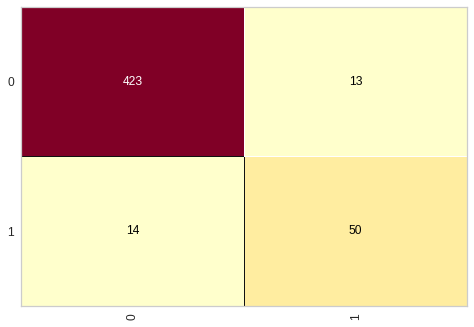

In [ ]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## **Regressão logística - base censo**

In [ ]:
with open('/content/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
logistic_census = LogisticRegression(random_state= 1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [ ]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.849539406345957

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

0.849539406345957

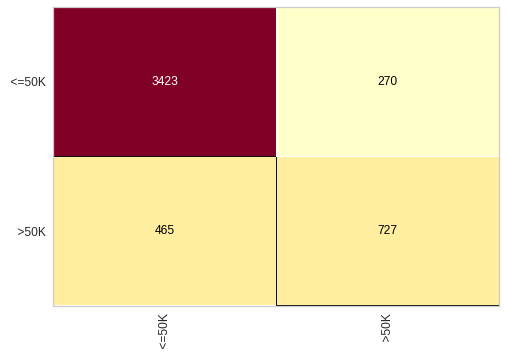

In [ ]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

# **Máquinas de vetores de suporte (SVM)**

Uma máquina de vetores de suporte (SVM, do inglês: support-vector machine) é um conceito na ciência da computação para um conjunto de métodos de aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de regressão. O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico. Dados um conjunto de exemplos de treinamento, cada um marcado como pertencente a uma de duas categorias, um algoritmo de treinamento do SVM constrói um modelo que atribui novos exemplos a uma categoria ou outra. Um modelo SVM é uma representação de exemplos como pontos no espaço, mapeados de maneira que os exemplos de cada categoria sejam divididos por um espaço claro que seja tão amplo quanto possível. Os novos exemplos são então mapeados no mesmo espaço e preditos como pertencentes a uma categoria baseados em qual o lado do espaço eles são colocados.

Em outras palavras, o que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de hiperplano entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes, ver imagem:

https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte

**sklearn.svm.SVC**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

## **SVM - base crédito**

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
svm_credit = SVC(kernel='linear', random_state= 1, C= 1.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(kernel='linear', random_state=1)

In [ ]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.946

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

0.946

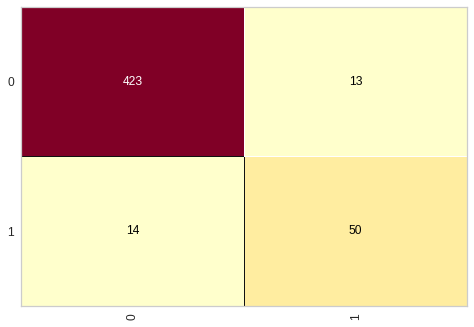

In [ ]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## **SVM - base censo**

In [ ]:
with open('/content/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
svm_census = SVC(kernel= 'linear', random_state=1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [ ]:
previsoes = svm_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

0.8507676560900717

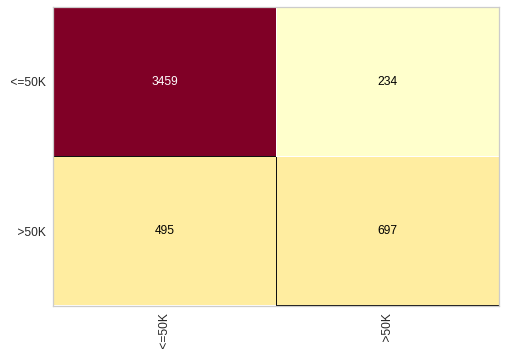

In [ ]:
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

# **Redes neurais artificiais**

Em ciência da computação e campos relacionados, redes neurais artificiais (português brasileiro) (RNAs) são modelos computacionais inspirados pelo sistema nervoso central de um animal (em particular o cérebro) que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. Redes neurais artificiais geralmente são apresentadas como sistemas de "neurônios interconectados, que podem computar valores de entradas", simulando o comportamento de redes neurais biológicas.

Por exemplo, uma rede neural para o reconhecimento de escrita manual é definida por um conjunto de neurônios de entrada que podem ser ativados pelos pixels de uma imagem de entrada. Os dados adquiridos por essa ativação dos neurônios são então repassados​​, ponderados e transformados por uma função determinada pelo designer da rede, a outros neurônios. Este processo é repetido até que, finalmente, um neurônio de saída é ativado. Isso determina que caractere foi lido.

Assim como outros métodos de aprendizado de máquina, sistemas que aprendem a partir dos dados, redes neurais têm sido usadas para resolver uma grande variedade de tarefas que são difíceis de resolver utilizando programação baseada em regras comuns, incluindo visão computacional e reconhecimento de voz.

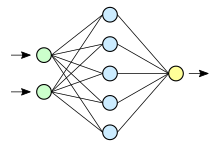

**sklearn.neural_network.MLPClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

## **Redes neurais - base crédito**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
rede_neural_credit = MLPClassifier()
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

In [ ]:
rede_neural_credit = MLPClassifier(max_iter=1000, verbose=True)
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.62202539
Iteration 2, loss = 0.56822370
Iteration 3, loss = 0.52142376
Iteration 4, loss = 0.48099163
Iteration 5, loss = 0.44505356
Iteration 6, loss = 0.41356516
Iteration 7, loss = 0.38501918
Iteration 8, loss = 0.35925053
Iteration 9, loss = 0.33585041
Iteration 10, loss = 0.31455000
Iteration 11, loss = 0.29532228
Iteration 12, loss = 0.27779039
Iteration 13, loss = 0.26214033
Iteration 14, loss = 0.24793749
Iteration 15, loss = 0.23502649
Iteration 16, loss = 0.22349893
Iteration 17, loss = 0.21276793
Iteration 18, loss = 0.20332245
Iteration 19, loss = 0.19446648
Iteration 20, loss = 0.18643645
Iteration 21, loss = 0.17915942
Iteration 22, loss = 0.17250063
Iteration 23, loss = 0.16642888
Iteration 24, loss = 0.16077706
Iteration 25, loss = 0.15557967
Iteration 26, loss = 0.15077623
Iteration 27, loss = 0.14618007
Iteration 28, loss = 0.14200309
Iteration 29, loss = 0.13804722
Iteration 30, loss = 0.13438390
Iteration 31, loss = 0.13090570
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

In [ ]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100)
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.78440187
Iteration 2, loss = 0.70027923
Iteration 3, loss = 0.62771481
Iteration 4, loss = 0.56524624
Iteration 5, loss = 0.51241553
Iteration 6, loss = 0.46719147
Iteration 7, loss = 0.42883918
Iteration 8, loss = 0.39569202
Iteration 9, loss = 0.36732627
Iteration 10, loss = 0.34287421
Iteration 11, loss = 0.32135474
Iteration 12, loss = 0.30289550
Iteration 13, loss = 0.28655550
Iteration 14, loss = 0.27175911
Iteration 15, loss = 0.25881274
Iteration 16, loss = 0.24705102
Iteration 17, loss = 0.23619287
Iteration 18, loss = 0.22658182
Iteration 19, loss = 0.21760820
Iteration 20, loss = 0.20945578
Iteration 21, loss = 0.20190183
Iteration 22, loss = 0.19493357
Iteration 23, loss = 0.18848550
Iteration 24, loss = 0.18245112
Iteration 25, loss = 0.17689576
Iteration 26, loss = 0.17170861
Iteration 27, loss = 0.16683697
Iteration 28, loss = 0.16218234
Iteration 29, loss = 0.15795809
Iteration 30, loss = 0.15395614
Iteration 31, loss = 0.15015546
Iteration 32, los

MLPClassifier(max_iter=1500, tol=1e-05, verbose=True)

In [ ]:
rede_neural_credit = MLPClassifier(max_iter=1500, 
                                   verbose=True, 
                                   tol=0.0000100,
                                   solver='adam',
                                   activation='relu',
                                   hidden_layer_sizes = (2, 2))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 1.05269432
Iteration 2, loss = 1.04038216
Iteration 3, loss = 1.02815766
Iteration 4, loss = 1.01638209
Iteration 5, loss = 1.00468258
Iteration 6, loss = 0.99324924
Iteration 7, loss = 0.98206995
Iteration 8, loss = 0.97107889
Iteration 9, loss = 0.96030347
Iteration 10, loss = 0.94978426
Iteration 11, loss = 0.93941325
Iteration 12, loss = 0.92947137
Iteration 13, loss = 0.91943069
Iteration 14, loss = 0.90968009
Iteration 15, loss = 0.89934968
Iteration 16, loss = 0.88832303
Iteration 17, loss = 0.87728855
Iteration 18, loss = 0.86639139
Iteration 19, loss = 0.85568659
Iteration 20, loss = 0.84490728
Iteration 21, loss = 0.83444569
Iteration 22, loss = 0.82396070
Iteration 23, loss = 0.81354786
Iteration 24, loss = 0.80321175
Iteration 25, loss = 0.79305573
Iteration 26, loss = 0.78301830
Iteration 27, loss = 0.77305312
Iteration 28, loss = 0.76318868
Iteration 29, loss = 0.75336514
Iteration 30, loss = 0.74361363
Iteration 31, loss = 0.73388924
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05, verbose=True)

In [ ]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_credit_teste, previsoes)

1.0

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

1.0

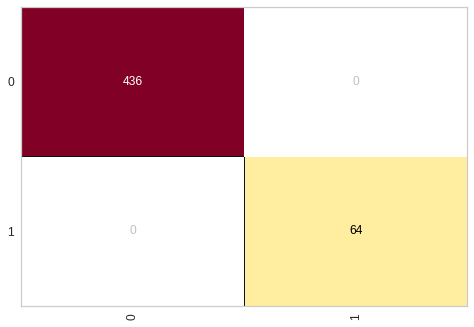

In [ ]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## **Redes neurais - base censo**

In [ ]:
with open('/content/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
rede_neural_census = MLPClassifier(max_iter=1000, 
                                   verbose=True, 
                                   tol=0.000010,
                                   hidden_layer_sizes = (55, 55))
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.38793317
Iteration 2, loss = 0.32869382
Iteration 3, loss = 0.31640982
Iteration 4, loss = 0.30949510
Iteration 5, loss = 0.30327185
Iteration 6, loss = 0.29999562
Iteration 7, loss = 0.29680176
Iteration 8, loss = 0.29361537
Iteration 9, loss = 0.29140087
Iteration 10, loss = 0.28919336
Iteration 11, loss = 0.28664603
Iteration 12, loss = 0.28478525
Iteration 13, loss = 0.28257174
Iteration 14, loss = 0.28065513
Iteration 15, loss = 0.27831062
Iteration 16, loss = 0.27727019
Iteration 17, loss = 0.27567533
Iteration 18, loss = 0.27329390
Iteration 19, loss = 0.27196489
Iteration 20, loss = 0.27085353
Iteration 21, loss = 0.26848353
Iteration 22, loss = 0.26765689
Iteration 23, loss = 0.26599581
Iteration 24, loss = 0.26500489
Iteration 25, loss = 0.26376531
Iteration 26, loss = 0.26206686
Iteration 27, loss = 0.26039995
Iteration 28, loss = 0.25913743
Iteration 29, loss = 0.25789308
Iteration 30, loss = 0.25620833
Iteration 31, loss = 0.25473856
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

**sklearn.metrics.accuracy_score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8196519959058342

**sklearn.metrics.confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

0.8196519959058342

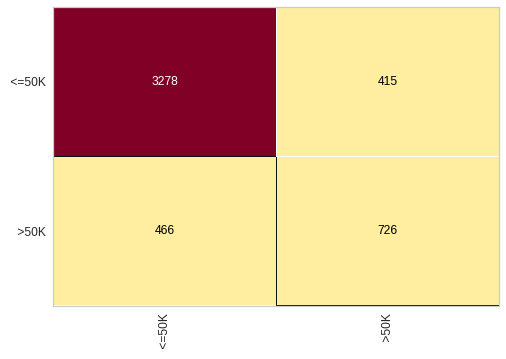

In [ ]:
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score( X_census_teste, y_census_teste)

# **Avaliação de algoritmos de classificação**

**Avaliação dos algoritmos**
*  Naïve Bayes: 93.80
*  Árvore de decisão: 98.20
*  Random forest: 98.40
*  Regras: 97.40
*  Knn: 98.60
*  Regressão logística: 94.60
*  SVM: 98.80
*  Redes neurais: 99.60


**sklearn.model_selection.GridSearchCV**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

## **Ajuste dos parâmetros dos algoritmos**

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
X_credit.shape

(2000, 3)

In [ ]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [ ]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

## **Árvore de decisao**

**sklearn.tree.DecisionTreeClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}
parametros

{'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 5, 10],
 'min_samples_split': [2, 5, 10],
 'splitter': ['best', 'random']}

In [ ]:
grid_serch = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_serch.fit(X_credit, y_credit)
melhores_paramentros = grid_serch.best_params_
melhor_resultado = grid_serch.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


## **Random forest**

**sklearn.ensemble.RandomForestClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}
parametros

{'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 5, 10],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 40, 100, 150]}

In [ ]:
grid_serch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_serch.fit(X_credit, y_credit)
melhores_paramentros = grid_serch.best_params_
melhor_resultado = grid_serch.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9870000000000001


## **Knn**

**sklearn.neighbors.KNeighborsClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1,2]}
parametros

{'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]}

In [ ]:
grid_serch = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_serch.fit(X_credit, y_credit)
melhores_paramentros = grid_serch.best_params_
melhor_resultado = grid_serch.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


## **Regressão logística**

**sklearn.linear_model.LogisticRegression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
parametros = {'tol': [0.001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
parametros

{'C': [1.0, 1.5, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'tol': [0.001, 1e-05, 1e-06]}

In [ ]:
grid_serch = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_serch.fit(X_credit, y_credit)
melhores_paramentros = grid_serch.best_params_
melhor_resultado = grid_serch.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'newton-cg', 'tol': 0.001}
0.9484999999999999


## **SVM**

**sklearn.svm.SVC**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC()

SVC()

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
parametros

{'C': [1.0, 1.5, 2.0],
 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
 'tol': [0.001, 0.0001, 1e-05]}

In [ ]:
grid_serch = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_serch.fit(X_credit, y_credit)
melhores_paramentros = grid_serch.best_params_
melhor_resultado = grid_serch.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


## **Redes neurais**

**sklearn.neural_network.MLPClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPClassifier()

MLPClassifier()

In [ ]:
parametros = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 
              'solver': ['lbfgs', 'sgd', 'adam'],
              'batch_size': [10, 56]}
parametros

{'activation': ['identity', 'logistic', 'tanh', 'relu'],
 'batch_size': [10, 56],
 'solver': ['lbfgs', 'sgd', 'adam']}

In [ ]:
grid_serch = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_serch.fit(X_credit, y_credit)
melhores_paramentros = grid_serch.best_params_
melhor_resultado = grid_serch.best_score_


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
print(melhores_paramentros)
print(melhor_resultado)

{'activation': 'tanh', 'batch_size': 10, 'solver': 'lbfgs'}
0.9964999999999999


## **Validação cruzada**

**sklearn.model_selection.KFold**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [ ]:
from sklearn.model_selection import KFold

**sklearn.model_selection.cross_val_score**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', 
                                  min_samples_leaf=1, 
                                  min_samples_split=5, 
                                  splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', 
                                         min_samples_leaf = 1, 
                                         min_samples_split=5, 
                                         n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

15


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

16


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

17


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

18


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

19


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

20


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

21


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

22


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

24


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

25


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

26


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

27


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

28


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

29


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

## **Análise dos resultados**

In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 
                           'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 
                           'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 
                           'Rede neural': resultados_rede_neural})
resultados

Arvore  Random forest     KNN  Logistica     SVM  Rede neural
0   0.9870         0.9860  0.9815     0.9475  0.9845       0.9985
1   0.9850         0.9760  0.9800     0.9465  0.9840       0.9985
2   0.9905         0.9820  0.9795     0.9470  0.9865       0.9975
3   0.9880         0.9855  0.9780     0.9460  0.9850       0.9965
4   0.9885         0.9880  0.9820     0.9465  0.9850       0.9970
5   0.9890         0.9855  0.9780     0.9465  0.9845       0.9975
6   0.9880         0.9875  0.9805     0.9470  0.9860       0.9970
7   0.9875         0.9865  0.9800     0.9480  0.9850       0.9975
8   0.9870         0.9845  0.9795     0.9465  0.9840       0.9965
9   0.9875         0.9845  0.9820     0.9465  0.9845       0.9970
10  0.9860         0.9880  0.9795     0.9475  0.9840       0.9955
11  0.9895         0.9845  0.9825     0.9480  0.9845       0.9970
12  0.9890         0.9840  0.9825     0.9475  0.9855       0.9970
13  0.9870         0.9825  0.9780     0.9475  0.9855       0.9975
14  0.9840         0.9860  0.9810     0.9485  0.9830       0.9970
15  0.9865         0.9850  0.9790     0.9475  0.9865       0.9980
16  0.9855         0.9855  0.9810     0.9460  0.9860       0.9970
17  0.9905         0.9830  0.9800     0.9470  0.9865       0.9965
18  0.9875         0.9840  0.9805     0.9465  0.9850       0.9965
19  0.9870         0.9845  0.9795     0.9465  0.9845       0.9970
20  0.9830         0.9865  0.9820     0.9465  0.9840       0.9975
21  0.9870         0.9820  0.9825     0.9470  0.9850       0.9980
22  0.9890         0.9845  0.9780     0.9455  0.9865       0.9980
23  0.9875         0.9825  0.9810     0.9465  0.9875       0.9965
24  0.9880         0.9845  0.9795     0.9470  0.9870       0.9975
25  0.9880         0.9880  0.9790     0.9470  0.9820       0.9970
26  0.9875         0.9835  0.9770     0.9475  0.9840       0.9975
27  0.9860         0.9835  0.9785     0.9465  0.9865       0.9965
28  0.9865         0.9865  0.9790     0.9480  0.9835       0.9975
29  0.9880         0.9850  0.9805     0.9465  0.9865       0.9970

In [ ]:
resultados.describe()

Arvore  Random forest        KNN  Logistica        SVM  Rede neural
count  30.000000      30.000000  30.000000  30.000000  30.000000    30.000000
mean    0.987367       0.984650   0.980050   0.946950   0.985083     0.997183
std     0.001671       0.002368   0.001533   0.000687   0.001280     0.000650
min     0.983000       0.976000   0.977000   0.945500   0.982000     0.995500
25%     0.986625       0.983625   0.979000   0.946500   0.984125     0.997000
50%     0.987500       0.984500   0.980000   0.947000   0.985000     0.997000
75%     0.988000       0.986000   0.981000   0.947500   0.986375     0.997500
max     0.990500       0.988000   0.982500   0.948500   0.987500     0.998500

In [ ]:
resultados.var()

Arvore           2.791954e-06
Random forest    5.606034e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      4.221264e-07
dtype: float64

In [ ]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.169229
Random forest    0.240462
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.065155
dtype: float64

## **Teste de normalidade nos resultados**

In [ ]:
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import  MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
alpha = 0.05

In [ ]:
shapiro(resultados_arvore),  shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9622188210487366, 0.3525342643260956),
 (0.8781099319458008, 0.0025518168695271015),
 (0.9584026336669922, 0.28181564807891846),
 (0.9370993375778198, 0.07600117474794388),
 (0.962294340133667, 0.35407164692878723),
 (0.9332398176193237, 0.05989827960729599))

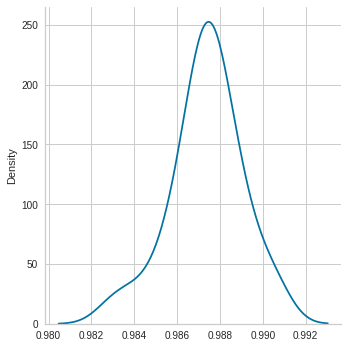

In [ ]:
sns.displot(resultados_arvore, kind='kde');

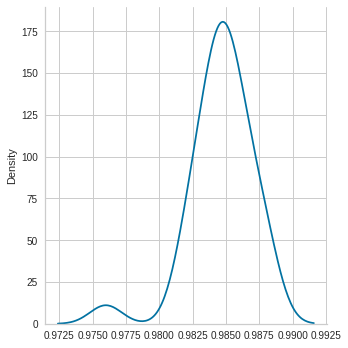

In [ ]:
sns.displot(resultados_random_forest, kind='kde');

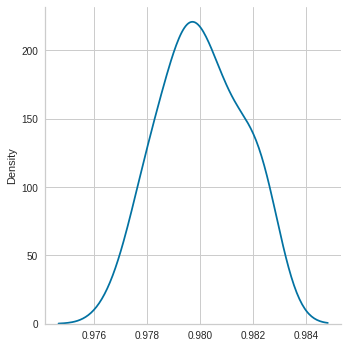

In [ ]:
sns.displot(resultados_knn, kind='kde');

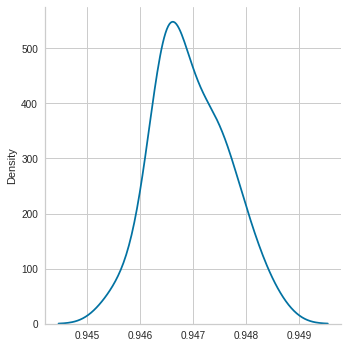

In [ ]:
sns.displot(resultados_logistica, kind='kde');

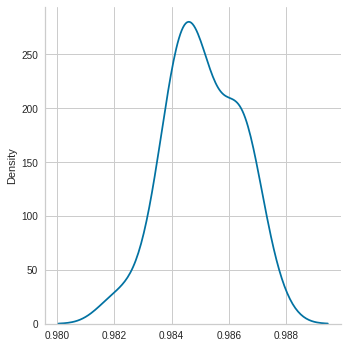

In [ ]:
sns.displot(resultados_svm, kind='kde');

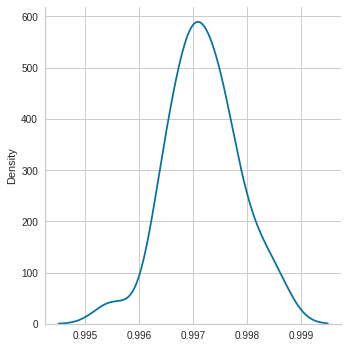

In [ ]:
sns.displot(resultados_rede_neural, kind='kde');

## **Melhor algoritmo com ANOVA e Tukey**

In [ ]:
_, p = f_oneway(resultados_arvore, 
                resultados_random_forest, 
                resultados_knn, 
                resultados_logistica, 
                resultados_rede_neural)
p

2.5962263487079734e-152

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes.')
else:
  print('Hipótese alternativa rejeitada')  

Hipótese nula rejeitada. Dados são diferentes.


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

accuracy    algoritmo
0      0.9870       arvore
1      0.9850       arvore
2      0.9905       arvore
3      0.9880       arvore
4      0.9885       arvore
..        ...          ...
175    0.9970  rede_neural
176    0.9975  rede_neural
177    0.9965  rede_neural
178    0.9975  rede_neural
179    0.9970  rede_neural

[180 rows x 2 columns]

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0073  0.001 -0.0084 -0.0062   True
       arvore     logistica  -0.0404  0.001 -0.0415 -0.0393   True
       arvore random_forest  -0.0027  0.001 -0.0038 -0.0016   True
       arvore   rede_neural   0.0098  0.001  0.0087  0.0109   True
       arvore           svm  -0.0023  0.001 -0.0034 -0.0012   True
          knn     logistica  -0.0331  0.001 -0.0342  -0.032   True
          knn random_forest   0.0046  0.001  0.0035  0.0057   True
          knn   rede_neural   0.0171  0.001   0.016  0.0182   True
          knn           svm    0.005  0.001  0.0039  0.0061   True
    logistica random_forest   0.0377  0.001  0.0366  0.0388   True
    logistica   rede_neural   0.0502  0.001  0.0491  0.0513   True
    logistica           svm   0.0381  0.001   0.037  0.0392   

In [ ]:
resultados.mean()

Arvore           0.987367
Random forest    0.984650
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997183
dtype: float64

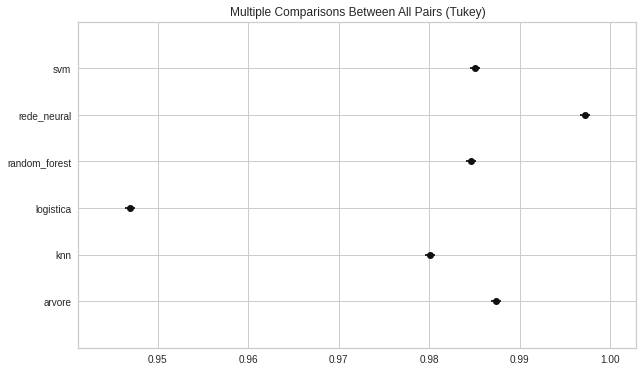

In [ ]:
teste_estatistico.plot_simultaneous();

## **Salvar um classificador já treinado**

**Três melhores Algorítmos**

In [ ]:
with open('/content/risco_redito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

In [ ]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [ ]:
classificador_rede_neural = MLPClassifier(activation='relu',
                                          batch_size = 56, 
                                          solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', 
                                              min_samples_leaf=1, 
                                              min_samples_split=5, 
                                              splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
classificador_svm = SVC(C = 2.0, 
                        kernel='rbf', 
                        probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [ ]:
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

In [ ]:
rede_neural = pickle.load(open('/content/rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('/content/arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('/content/svm_finalizado.sav', 'rb'))

In [ ]:
novo_registro = X_credit[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [ ]:
novo_registro.shape

(3,)

In [ ]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [ ]:
novo_registro

array([[-1.3754462 ,  0.50631087,  0.10980934]])

In [ ]:
rede_neural.predict(novo_registro)

array([0])

In [ ]:
arvore.predict(novo_registro)

array([0])

In [ ]:
svm.predict(novo_registro)

array([0])

# **Combinação e rejeição de classificadores**

## **Combinação de classificadores - implementação**

In [ ]:
novo_registro = X_credit[0]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.3754462 ,  0.50631087,  0.10980934]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural, resposta_arvore, resposta_svm

(array([0]), array([0]), array([0]))

In [ ]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1  

if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagaráo empréstimo')

Cliente pagará o empréstimo


## **Rejeição de classificadores - implementação**

In [ ]:
novo_registro = X_credit[0]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.3754462 ,  0.50631087,  0.10980934]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural, resposta_arvore, resposta_svm

(array([0]), array([0]), array([0]))

In [ ]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.0000000e+00, 3.9902661e-16]])

In [ ]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

0.9999999999999996

In [ ]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.0000000e+00, 3.9902661e-16]])

In [ ]:
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [ ]:
probabilidade_svm = svm.predict_proba(novo_registro)
probabilidade_svm

array([[9.99997994e-01, 2.00643303e-06]])

In [ ]:
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9999979935669657

In [ ]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede_neural[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1  

if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resposta_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagaráo empréstimo, baseado em {} algoritmos.'.format(algoritmos))

Cliente pagará o empréstimo, baseado em 2 algoritmos
